In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
groups_folder_path = '/content/drive/MyDrive/garbage_dataset/'
categories = ["can", "glass", "paper", "plastic", "trash"]
num_classes = len(categories)
img_real_dir = groups_folder_path + 'real_data'

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

real_data_generator_ag = ImageDataGenerator(rescale = 1./255)
real_data_generator = real_data_generator_ag.flow_from_directory(img_real_dir,
                                                               target_size = (224, 224),
                                                               color_mode = 'rgb',
                                                               shuffle = True,
                                                               batch_size = 16,
                                                               class_mode = 'categorical')

Found 1 images belonging to 1 classes.


## **성능이 가장 좋았던 VGG 16 모델을 불러와서 실제 사진에 대한 분류 진행**

In [4]:
import matplotlib.pyplot as plt
from keras import models

model = models.load_model('/content/drive/MyDrive/VGGNet_batchnorm(16)_shuffle_relu_lr0005_drop(03)_hflip_whsr_rz.h5')

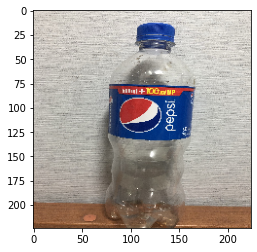

In [5]:
for data_batch, labels_batch in real_data_generator:
  break

image = data_batch[0]

plt.imshow(image)
plt.show()

In [6]:
label_list = {0: 'can', 1: 'glass', 2: 'paper', 3: 'plastic', 4: 'trash'}

## **실제 콜라 페트병을 plastic으로 분류**

In [8]:
results = model.predict(data_batch)
label_list[np.argmax(results[0])]

'plastic'